<a href="https://colab.research.google.com/github/AIshutin/tinkoff-textgen/blob/master/rnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Рекуррентные сети

* [Unreasonable effectiveness of RNN](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) (Andrej Karpathy)
* [Официальный код PyTorch](https://github.com/pytorch/examples/tree/master/word_language_model)

---

## Теория: работа с последовательными данными

Для анализа последовательных данных — звука, музыки, текста, цены биткоина, спортивной статистики, шахматных ходов, состояний игры в Доте — используются свои архитектуры, использующие «память» для обработки данных произвольной длины.

Пусть у нас есть какая-нибудь функция от двух векторных аргументов $f(x, h)$ (нейросеть с trainable параметрами — тоже как бы функция) и какая-нибудь последовательость входных данных $\{x_1, x_2, \ldots, x_n\}$.

Получим последовательность $\{h_1, h_2, \ldots, h_n\}$ по следующему правилу: $ h_t = f(x_i, h_{t-1}) $ ($h_0$ предполагаем чем-нибудь изначально инициализированным). Все осталньые $h_i$ будут потом использоваться для чего-то полезного.

Когда мы это всё развернем, на самом деле получится обычный статический вычислительный граф с кучей weight sharing-а, выходом которого будет $n$ скрытых состояний.

![RNN](https://i.stack.imgur.com/hzZ4m.png)

Подобные архитектуры называют рекуррентными сетями.

## Затухающий градиент

Глубокие сети очень трудно обучать. Рекуррентная сеть по сути не отличается от очень глубокой статичной сети, вход которой просто подается на разные уровни глубины. Такой сети очень трудно будет уловить связь, между данными, расположенными на большом расстоянии.

Чтобы с этим побороться, придумали *механизмы памяти*.

<img src='https://d3ansictanv2wj.cloudfront.net/figure1-4ee485edcb5d51bbed8e4fa14d54a649.jpg' width='400px'>

<center>Сверху — не бро, снизу — бро.</center>

Представьте конвейерную ленту, которая движется вдоль наших последовательных данных. Информация с данных может запрыгивать на ленту, проезжать вперед и спрыгивать оттуда, когда она понадобится. LSTM (long-short term memory) — это тот блок, который решает, какой информации нужно запрыгнуть. Он позволяет сохранять информацию до более позднего времени, когда она понадобится.

Он состоит из нескольких «гейтов», каждый из которых представляет собой trainable матрицу. Эти гейты решают, что можно забыть, что можно добавить, и что сейчас в данный момент важно от входных данных. Они считают маски — вектора после softmax — на которые домножаются входные данные.

<img src='http://colah.github.io/images/post-covers/lstm.png' width='400px'>

Эту LSTM-ячейку мы просто будем использовать в качестве $𝑓$. Суть не изменилась: граф также разворачивается в статический, только более сложный.

## Эмбеддинги

Нейросети не берут на вход сырые текстовые данные, а работают с векторами. Как правило, текст разделяют (*токенизируют*) на мелкие куски (буквы, слова, отдельные слоги), а дальше логично каждый токен заменить на one-hot вектор размерности словаря (все элементы нули, кроме одного, соответствующего номеру токена).

Но что будет, если помножить one-hot вектор на матрицу? Получится просто какая-то строка матрицы. Вместо этой операции можно было сразу вставить строку, соответствующую единичке. Эта операция называется embedding. Теперь мы можем просто сопоставить каждому уникальному токеру свой обучаемый вектор.

У этих векторов есть смысл и много применений. Когда они уже обучены на какой-то реальной задаче, они становятся очень информативными. Синонимы должны иметь очень близкие вектора. Например, с ними работает всякая алгебра типа «король - мужчина + женщина = королева».

<img src='https://cdn-images-1.medium.com/max/1600/1*jpnKO5X0Ii8PVdQYFO2z1Q.png' width='500px'>

Впрочем, геометрическая интерпретация пока не нашла особых применений.

Зацените ещё эту игру: https://research.google.com/semantris

# Практика: языковые модели

Вам нужно закодить задание с отбора, только на максималках. Напомним:

**Марковский процесс** — случайный процесс, эволюция которого на каждом шаге не зависит от предшествовавшей истории.

Естественный язык, музыку и всё такое можно тоже моделировать как марковский процесс, где состоянием будет всё, что сгенерировали ранее. Языковые модели — это аппроксиматоры такого марковского процесса. Одним из способов её реализовать является рекуррентная сеть, обученная предсказывать следующий токен по всем предыдущим.

<img src='http://2.bp.blogspot.com/-U2fyhOJ7bN8/UJsL23oh3zI/AAAAAAAADRs/wZNWvVR-Jco/s1600/text-markov.png' width='300px'>

Языковые модели используются очень много где — это одна из центральных тем в NLP.

* Ими можно делать диалоговые системы: скармливаем предыдущее сообщение и генерируем следующее до токена остановки.
* Подсказки поиска в Google делаются примерно на них.
* Автокоррекцию и спеллчекинг можно сделать, находя «странные» токены.
* Их можно пихнуть в ансамбль для задачи перевода, например.
* Сжатие текстовых данных основано на языковых моделях (правда не нейросетевых, потому что они сами весят много). Есть способ сжимать данные эффективно, если мы знаем их распределение — называется арифметическое кодирование.
* Тренд 2018 года: делать клёвые вещи из скрытых слоев языковой модели (см. ELMo, ULMFiT, OpenAI GPT, BERT).

## Препроцессинг

Возьмите какие-нибудь сырые данные. Википедия, «Гарри Поттер», «Игра Престолов», твиты Тинькова — что угодно.

In [0]:
!cat a1.txt >> source.txt
!cat a2.txt >> source.txt
!cat a3.txt >> source.txt

In [1]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


Selecting previously unselected package libkmod2:amd64.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../libkmod2_24-1ubuntu3.1_amd64.deb ...
Unpacking libkmod2:amd64 (24-1ubuntu3.1) ...
Selecting previously unselected package kmod.
Preparing to unpack .../kmod_24-1ubuntu3.1_amd64.deb ...
Unpacking kmod (24-1ubuntu3.1) ...
Selecting previously unselected package module-init-tools.
Preparing to unpack .../module-init-tools_24-1ubuntu3.1_all.deb ...
Unpacking module-init-tools (24-1ubuntu3.1) ...
Setting up libkmod2:amd64 (24-1ubuntu3.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up kmod (24-1ubuntu3.1) ...
Setting up module-init-tools (24-1ubuntu3.1) ...
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 26444 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 

In [0]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
raw_text = ''
with open('drive/rnn/source.txt', 'r', encoding='windows-1251') as file:
    raw_text = file.read().lower()
    print('ok', len(raw_text))

ok 3583350


In [0]:
raw_text = raw_text[275:-275]

In [0]:
len(raw_text)

3582800

In [28]:
def clean(text):
    res = []
    was = False
    for el in text:
        if el.isalpha():
            res.append(el)
            was = False
        else:
            if not was:
                res.append(' ')
                was = True
    return res

print(raw_text[:100])
print(''.join(clean(raw_text[:100])))

text = clean(raw_text)
print(set(text))

ик ротфусс

«имя ветра»

моей матери, которая научила меня любить книги и открыла мне двери в нарнию
ик ротфусс имя ветра моей матери которая научила меня любить книги и открыла мне двери в нарнию
{'i', 'з', 'ё', 'м', 'ш', 'h', 'l', 'л', 'm', 'b', ' ', 'д', 'и', 'w', 'f', 'ъ', 'c', 'в', 'т', 'd', 'p', 'a', 'ф', 't', 'ь', 'с', 'u', 'ч', 'e', 'п', 'n', 'g', 'о', 'р', 'й', 'а', 'г', 'v', 'ю', 'r', 'k', 'б', 'к', 's', 'э', 'ц', 'щ', 'y', 'ж', 'н', 'у', 'я', 'е', 'ы', 'х', 'o'}


Вспомните, как вы писали языковую модель для отбора. Сделайте такую же токенизацию — сопоставьте всем различным символам свой номер. Удобно это хранить просто в питоновском словаре (`char2idx`). Для генерации вам потребуется ещё и обратный словарь (`idx2char`).

Клёво будет ещё написать отдельный класс, который делает токенизацию и детокенизацию.

In [0]:
class Vocab:
    def __init__(self, data):
        self.char2idx = {}
        self.idx2char = {}
        for c in data:
            if c not in self.char2idx:
                self.char2idx[c] = len(self.idx2char)
                self.idx2char[len(self.char2idx) - 1] = c
    
    def tokenize(self, sequence):
        res = []
        for el in sequence:
            dummy = [0] * len(self)
            dummy[self.char2idx[el]] = 1
            res.append(dummy)
        return res
    
    def detokenize(self, sequence):
        res = []
        for el in sequence:
            mx = 0
            for i in range(len(el)):
                if el[i] > el[mx]:
                    mx = i
            res.append(self.idx2char[mx])
        return res
    
    def __len__(self):
        return len(self.char2idx)

In [0]:
voc = Vocab(text)

In [10]:
print(''.join(voc.detokenize(voc.tokenize(text[100:150]))))

 и средиземье и моему отцу который научил меня пра


In [11]:
import sys
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [12]:
!pip3 install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

    100% |████████████████████████████████| 512.6MB 49.5MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58fb6000 @  0x7fd5de61c2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 14.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
from torch import nn
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from matplotlib.pyplot import plot as plt
from torch import tensor
import torch.nn.functional as F
from torch.distributions.one_hot_categorical import OneHotCategorical

In [14]:
torch.cuda.device_count()

1

In [0]:
device = torch.device('cpu' if torch.cuda.device_count() == 0 else 'cuda:0')

In [0]:
#text = text[:60000]

In [17]:
device

device(type='cuda', index=0)

In [18]:
len(text)

60000

In [0]:
class TextData(Dataset):
    def __init__(self, text, max_length):
        print("TextData", len(text), max_length)
        self.data = text
        self.max_length = max_length
    
    def __getitem__(self, ind):
        return (tensor(self.data[ind:ind + self.max_length], dtype=torch.float),
                tensor(self.data[ind + 1:ind + self.max_length + 1], dtype=torch.long))
    
    def __len__(self):
        return len(self.data) - self.max_length

TextData 40200 40
TextData 19800 40


In [0]:
cpu = torch.device('cpu')

In [0]:
def validate(model):
    with torch.no_grad():
      good = 0
      total = 0
      model.eval()
      for (x, real) in validator:
          x = x.transpose(0, 1)
          y = model(x)
          target = torch.max(real.transpose(0, 1), dim=2)[1].to(device).reshape(-1)
          have = torch.max(y, dim=2)[1].reshape(-1)
          #print(target.shape, have.shape)
          total += target.shape[0]
          #print(type(target == have), (target == have).shape)
          good += (target == have).sum()
      #print(good, total)
      return float(good) / float(total)

## Модель

Примерно такое должно зайти:

* Эмбеддинг
* LSTM / GRU
* Дропаут
* Линейный слой
* Softmax

Вам нужно по префиксу научиться предсказывать вероятности следующего токена. По сути это задача классификации.

Так можно делать, но это неэффективно. Пусть вы учли контекст размера 50. Вы потратите очень много вычислений лишь чтобы предсказать один токен в самом конце. Вместо этого вы можете предсказывать сразу все 50 токенов. Для этого нужно поддерживать hidden state и из него на ходу делать предсказание следующего токена и считать на нем лосс классификации, и этот же токен потом кормить в модель на вход, получая новый hidden state. Так вы по сути делаете сразу 50 классификаций за примерно то же количество вычислений, и ваша модель обучается намного быстрее. Этот трюк называется **teacher forcing**.

## Обучение

* Делайте сэмплирование предложений фиксированной длины из вашего корпуса. Можете как нарезать их изначально, так и написать генератор.
* Используйте teacher forcing.
* Выход модели — это one-hot вход, смещенный на одну позиию.
* Функция потерь: кроссэнтропия.
* Не забудьте мониторить и валидацию, и train.

In [0]:
class Model(nn.Module):
    def __init__(self, **kwarg):
        self.embed_length = kwarg['embeding']
        self.vocab = kwarg['vocab_size']
        self.hidd_size = self.embed_length
        super(Model, self).__init__()
        
        self.embed = nn.Linear(self.vocab, self.embed_length)
        
        self.lstm = nn.LSTM(input_size=self.embed_length, hidden_size=self.hidd_size, num_layers=2)
        
        self.final = nn.Linear(self.embed_length, self.vocab)
    
    def get_hidden(self, batch_size):
        hidden = torch.zeros(2, batch_size, self.hidd_size, device=device)
        cell_states = torch.zeros(2, batch_size, self.hidd_size, device=device)
        return (hidden, cell_states)
    
    def forward(self, X):
        batch_size = X.shape[1]
        length = X.shape[0]
        X_D = tensor(X).to(device)
        X1 = self.embed(X_D.view(-1, self.vocab))#.to(device)
        X1 = X1.view(length, batch_size, -1)
        hidden, cell_states = self.get_hidden(batch_size)
        res, (_, __) = self.lstm(X1, (hidden, cell_states))
        '''for i in range(length):
            out, hidden = self.lstm(X1[i].view(1, batch_size, -1), hidden.view(1, -1, 5))
            preds.append(out)'''
        #res = torch.stack(preds).to(device)
        out = self.final(res.view(length, batch_size, -1))
        out = out - out.data.max()
        return F.softmax(out, dim=2)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
batch_size = 256
sequence_len = 40
learning_rate = 0.01

p = 0.33
START_VAL = int(len(text) * p) 
dataset = TextData(voc.tokenize(text[:-START_VAL]), sequence_len)
val_dataset = TextData(voc.tokenize(text[-START_VAL:]), sequence_len)
loader = DataLoader(dataset, batch_size=batch_size)
validator = DataLoader(val_dataset, batch_size=batch_size)

TextData 2249000 40
TextData 1107715 40


In [0]:
def check_prob(probs):
  assert(int(torch.max(probs.view(-1))[0]) <= 1)

In [0]:
from torch.nn.modules.loss import NLLLoss
criterion = NLLLoss()
model = Model(embeding=15, vocab_size=len(voc)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

1000 8785
2000 8785
3000 8785
4000 8785
5000 8785
6000 8785
7000 8785
8000 8785
epoch: 0 val_acc: 0.22697785902904732


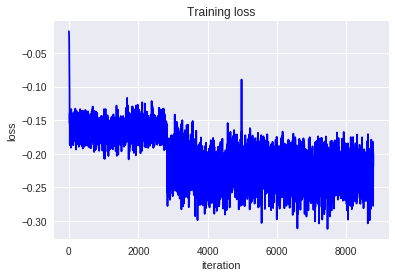

In [0]:
losses = []
for epoch in range(15):
    model.train()
    ind = 0
    if epoch == 4:
      for g in optimizer.param_groups:
        g['lr'] = 0.001
    for (x, real) in loader:
        model.zero_grad()
        optimizer.zero_grad()
        x = x.transpose(0, 1)
        target = torch.max(real.transpose(0, 1), dim=-1)[1].to(device)
        #print(x.shape)
        y = model(x)
        #check_prob(y)
        loss = criterion(y.view(-1, len(voc)), target.reshape(-1))
        loss.backward()
        losses.append(loss.item())
        #torch.nn.utils.clip_grad_norm(model.parameters(), 40)
        optimizer.step()
        ind += 1
        if ind % 1000 == 0:
          print(ind, len(loader))
    print('epoch:', epoch, 'val_acc:', validate(model))
    plt.title("Training loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.plot(losses, 'b')
    plt.show()
    

epoch: 0 val_acc: 0.16200531376518218


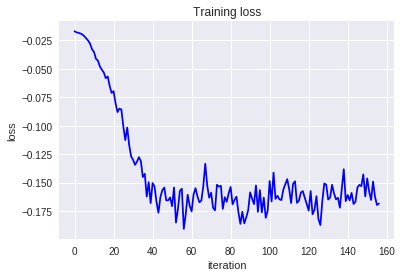

epoch: 1 val_acc: 0.16200531376518218


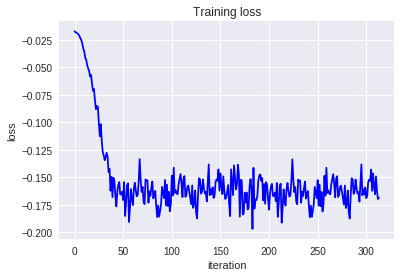

epoch: 2 val_acc: 0.16200531376518218


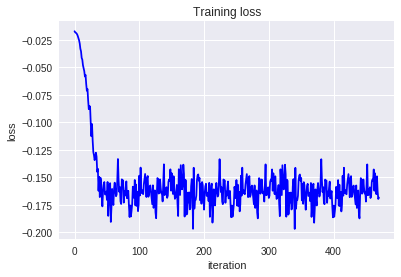

epoch: 3 val_acc: 0.21592611336032388


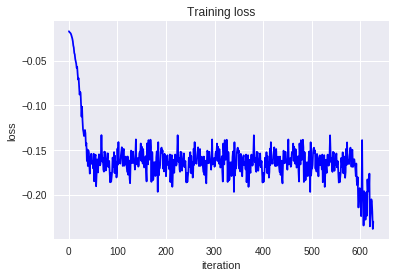

epoch: 4 val_acc: 0.2195824898785425


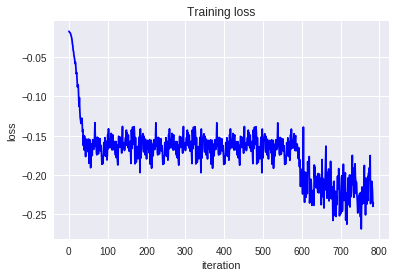

epoch: 5 val_acc: 0.2199493927125506


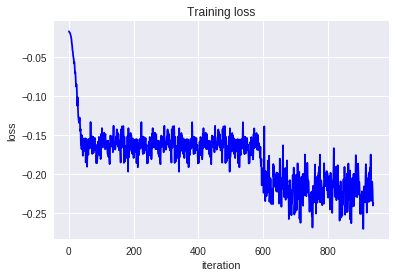

epoch: 6 val_acc: 0.22001897773279352


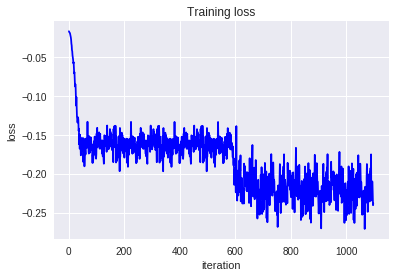

epoch: 7 val_acc: 0.22002403846153845


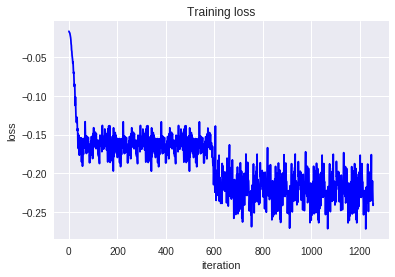

epoch: 8 val_acc: 0.22070597165991904


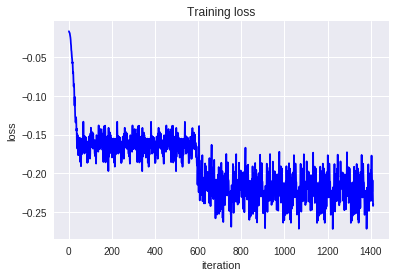

epoch: 9 val_acc: 0.22197115384615385


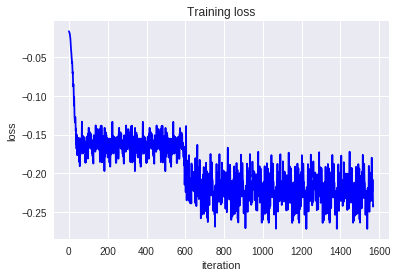

epoch: 10 val_acc: 0.2219547064777328


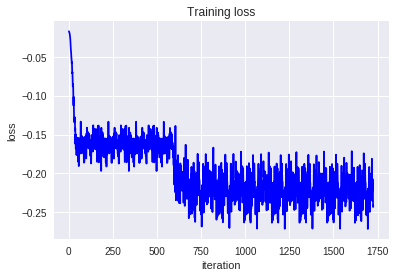

epoch: 11 val_acc: 0.2219585020242915


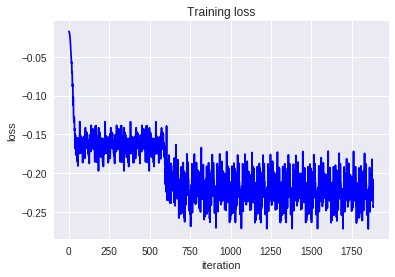

epoch: 12 val_acc: 0.22202682186234818


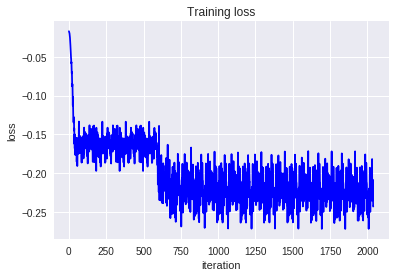

epoch: 13 val_acc: 0.22194458502024292


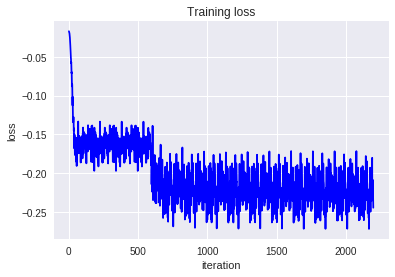

epoch: 14 val_acc: 0.22194585020242916


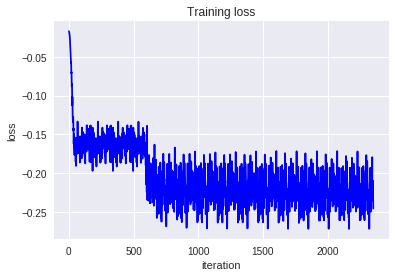

In [0]:
losses = []
for epoch in range(15):
    model.train()
    ind = 0
    if epoch == 4:
      for g in optimizer.param_groups:
        g['lr'] = 0.001
    for (x, real) in loader:
        model.zero_grad()
        optimizer.zero_grad()
        x = x.transpose(0, 1)
        target = torch.max(real.transpose(0, 1), dim=-1)[1].to(device)
        #print(x.shape)
        y = model(x)
        loss = criterion(y.view(-1, len(voc)), target.reshape(-1))
        loss.backward()
        losses.append(loss.item())
        #torch.nn.utils.clip_grad_norm(model.parameters(), 40)
        optimizer.step()
        ind += 1
        if ind % 1000 == 0:
          print(ind, len(loader))
    print('epoch:', epoch, 'val_acc:', validate(model))
    plt.title("Training loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.plot(losses, 'b')
    plt.show()
    

In [0]:
validate(model)

tensor(60974, device='cuda:0') 394400


0.15459939148073024



## Спеллчекер

Из языковой модели можно сделать простенький спеллчекер: можно визуализировать предсказанные вероятности на каждом символе.

Бонус: можете усреднить перплексии по словам и выделять их, а не отдельные символы.

In [0]:
from IPython.core.display import display, HTML

def print_colored(sequence, intensities, delimeter=''):
    html = delimeter.join([
        f'<span style="background: rgb({255}, {255-x}, {255-x})">{c}</span>'
        for c, x in zip(sequence, intensities) 
    ])
    display(HTML(html))

print_colored('Налейте мне экспрессо'.split(), [0, 0, 100], ' ')

sequence = 'Эту домашку нужно сдать втечении двух недель'
intensities = [0]*len(sequence)
intensities[25] = 50
intensities[26] = 60
intensities[27] = 70
intensities[31] = 150
print_colored(sequence, intensities)

In [0]:
tocheck = ['деманы еще ни проснулись а профессор в у ниверситете уже заснул',
        'как пройти в библиотеку',
        'норм прогеры кодят нейроинтерфейсы попивая смузи и катаясь на гироскутере по дороге в барбершоп или коворкинг']

In [0]:
tocheck.append(text[2000:2300])

In [0]:
threshold = 0.02
for sent in tocheck[:]:
    #print(sent)
    prob = model(tensor(voc.tokenize(sent), dtype=torch.float).view(len(sent), 1, -1))
    col = [0] * len(sent)
    for i in range(len(sent)):
        if max(prob[i][0]) - prob[i][0][voc.char2idx[sent[i]]] >= threshold:
            col[i] = 100
        #print(sent[i], prob[i][0][voc.char2idx[sent[i]]], max(prob[i][0]))
    print_colored(sent, col)
    print()

## Генерация предложений

* Поддерживайте hidden state при генерации. Не пересчитывайте ничего больше одного раза.
* Прикрутите температуру: это когда при сэмплировании все логиты (то, что перед софтмаксом) делятся на какое-то число (по умолчанию 1, тогда ничего не меняется). Температура позволяет делать trade-off между разнообразием и правдоподобием (подробнее — см. блог Карпатого).
* Ваша реализация должна уметь принимать строку seed — то, с чего должно начинаться сгенерированная строка.

In [0]:
import random as rd
def sample(self, length, temperature=1, seed=[]):
        with torch.no_grad():
            res = [tensor(el, dtype=torch.float).to(device) for el in seed]
            hidden = torch.randn(2, 1, self.hidd_size).to(device)
            cell_states = torch.randn(2, 1, self.hidd_size).to(device)
            if len(seed) != 0:
                seed = self.embed(tensor(seed, dtype=torch.float).to(device))
                #print(type(seed))
                for i in range(seed.shape[0]):
                    _, (hidden, cell_states) = self.lstm(seed[i].view(1, 1, -1), (hidden, cell_states))
            print(voc.detokenize(res))
            
            out = torch.zeros(1, 1, self.vocab, dtype=torch.float).to(device)
            out[0, 0, rd.randint(1, self.vocab) - 1] = 1
            
            for i in range(length):
                out, (hidden, cell_states) = self.lstm(self.embed(out).view(1, 1, -1), (hidden, cell_states))
                z = F.softmax(self.final(out).view(-1) / temperature, dim=-1)
                #print(i, z, z.shape)
                out = OneHotCategorical(z).sample()
                #print(out, torch.max(out))
                res.append(out)   
                print(voc.detokenize(res))
            
            return res

In [0]:
model.sample = sample

In [0]:
print(model.sample)

<function sample at 0x7fba7e1e6c80>


In [0]:
print(''.join(voc.detokenize(sample(model, 20, 3, voc.tokenize('в университе')))))

NameError: ignored

In [0]:
print(''.join(voc.detokenize(sample(model, 20))))

[]
[' ']
[' ', 'н']
[' ', 'н', 'е']
[' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н']
[' ', 'н', 'е', ' ', 'н', 'е']
[' ', 'н', 'е', ' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е']
[' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ', 'н', 'е', ' ']
[' ', 'н', 'е', ' ', 'н', 'е

In [0]:
print(''.join(voc.detokenize(sample(model, 20, 1, voc.tokenize('о')))))

['о']
['о', 'е']
['о', 'е', ' ']
['о', 'е', ' ', 'п']
['о', 'е', ' ', 'п', 'о']
['о', 'е', ' ', 'п', 'о', ' ']
['о', 'е', ' ', 'п', 'о', ' ', 'п']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ']
['о', 'е', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п', 'о', ' ', 'п']
['о', 'е', ' ', 'п', 'о', ' ', 

In [0]:
import pickle

In [0]:
with open('drive/RNN/cnn-gru-2', 'wb') as file:
  pickle.dump(model, file)

In [0]:
with open('drive/RNN/cnn-gru-2', 'rb') as file:
  mdodel2 = pickle.load(file)